# Plots for showing that MPPleiden has variation across cell cycle and CSLs not

In [1]:
from campa.constants import campa_config
from campa_ana.constants import SOURCE_DIR
from campa.data import MPPData
from campa.tl import Experiment
from campa.tl import Cluster
from campa.tl._cluster import add_clustering_to_adata
from campa.pl import annotate_img
from campa.utils import init_logging
import os
import numpy as np
from pathlib import Path
import scanpy as sc
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
init_logging()

Reading config from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'plotting' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
fig_dir = Path(SOURCE_DIR)/'figures'/'fig1_suppl'
os.makedirs(str(fig_dir), exist_ok=True)

In [3]:
# colors for pixel approach and condVAE:
yellow = '#f8ba00'
blue = '#00a2ff'

## Load data

In [17]:
adatas = {}
adatas_sub = {}

exp_name = 'VAE_all/CondVAE_pert-CC'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_latent': 'latent', 'X_umap': 'umap'})
# add clustering and colormap (from cluster_name_annotation.csv) to adata
cl.set_cluster_name('clustering_res0.5') 
add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation)
add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), 'clustering_res0.5', adata, cl.cluster_annotation, annotation_col='annotation')


# subset of data to unperturbed
adata_sub = adata[adata.obs['perturbation_duration'].isin(
    ['DMSO-120', 'DMSO-720', 'normal'])]
adatas['CondVAE'] = adata
adatas_sub['CondVAE'] = adata_sub


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'latent', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'latent', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'latent', 'clustering_res0.5', 'umap'].
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'latent', 'clustering_res0.5', 'umap'].


In [18]:
exp_name = 'VAE_all/MPPleiden'
cluster_data_dir = os.path.join(exp_name, 'aggregated/sub-0.001')
# load cl
cl = Cluster.from_cluster_data_dir(cluster_data_dir)
# get adata object
adata = cl.cluster_mpp.get_adata(X='mpp', obsm={'X_umap': 'umap'})
# add clustering and colormap (from cluster_name_annotation.csv) to adata
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    cl.set_cluster_name(f'clustering_res{res:.1f}') 
    add_clustering_to_adata(os.path.join(campa_config.EXPERIMENT_DIR, cluster_data_dir), f'clustering_res{res:.1f}', adata, cl.cluster_annotation)


# subset of data to unperturbed
adata_sub = adata[adata.obs['perturbation_duration'].isin(
    ['DMSO-120', 'DMSO-720', 'normal'])]
adatas['MPPleiden'] = adata
adatas_sub['MPPleiden'] = adata_sub


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'umap'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.2', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.2', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.2.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.4.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.6', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.6', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.8', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res0.8', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.6.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res0.8.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res1.2', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res1.2', 'umap'].
INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res1.6', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res1.6', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res1.2.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res1.6.npy


INFO:MPPData:Created new: MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res2.0', 'umap'].
INFO:MPPData:Loaded data from VAE_all/MPPleiden/aggregated/sub-0.001.
INFO:Cluster:Loaded cluster_mpp MPPData for NascentRNA (154906 mpps with shape (3, 3, 34) from 11847 objects). Data keys: ['y', 'obj_ids', 'x', 'mpp', 'clustering_res2.0', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/VAE_all/MPPleiden/aggregated/sub-0.001/clustering_res2.0.npy


## Umaps

In [19]:
sns.set_style('white')
sns.set_context('talk')

perturbation_plot_colors = {
    'unperturbed': "#999999",
#    'Meayamycin (12.5h)':  "#56B4E9",
    'Triptolide (2.5h)': "#008000", #"#E69F00",
    'TSA (1h)': "#00FF00", # "#009E73",
}

### CondVAE

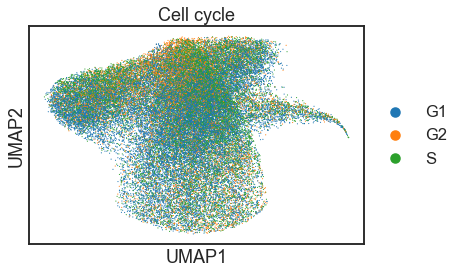

In [22]:
adata = adatas['CondVAE']
adata_sub = adatas_sub['CondVAE']

# ensure that order of points is random
random_indices=np.random.permutation(list(range(adata_sub.shape[0])))
fig, ax = plt.subplots()
sc.pl.umap(adata_sub[random_indices], color='cell_cycle', size=5, legend_loc='right margin', title='Cell cycle', ax=ax, show=False)
plt.savefig(fig_dir/'umap_condVAE_cell_cycle2.png', bbox_inches='tight', dpi=300)

### MPPleiden

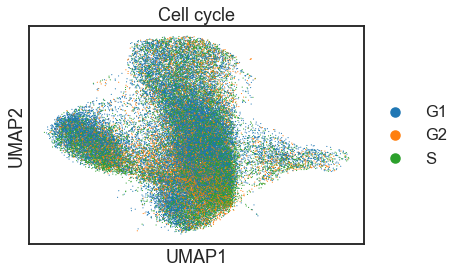

In [23]:
adata = adatas['MPPleiden']
adata_sub = adatas_sub['MPPleiden']

# plot perturbation
# ensure that order of points is random
random_indices=np.random.permutation(list(range(adata_sub.shape[0])))
fig, ax = plt.subplots()
sc.pl.umap(adata_sub[random_indices], color='cell_cycle', size=5, legend_loc='right margin', title='Cell cycle', ax=ax, show=False)
plt.savefig(fig_dir/'umap_MPPleiden_cell_cycle2.png', bbox_inches='tight', dpi=300)

## Cluster size variation per cell cycle
using all perturbations

In [6]:
coeff_variation = {'CondVAE':{}, 'MPPleiden':{}}

sns.set_style('white')
sns.set_context('poster', rc = {'patch.linewidth': 0.0})

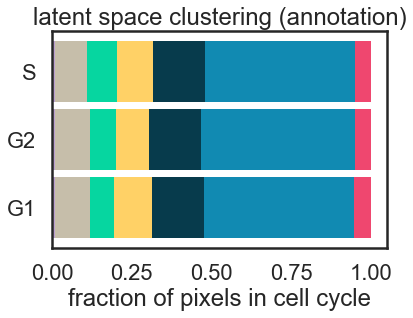

In [7]:
# calculate
adata = adatas['CondVAE']
cluster_name = 'annotation'

cluster_size = {}
for pert, grp in adata.obs.groupby('cell_cycle'):
    cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
df = pd.concat(cluster_size, axis=1)
df = df / df.sum(axis=0)

coeff_variation['CondVAE'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

# plot
cats = adata.obs[cluster_name].cat.categories
fig, ax = plt.subplots()
bottom = np.array([0 for _ in df.columns]).astype('float')
for i in range(len(cats)):
    if i > 0:
        bottom += np.array(df.loc[cats[i-1]])
    ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
        color=adata.uns[cluster_name+'_colors'][i])
ax.set_xlabel('fraction of pixels in cell cycle')
ax.set_title(f'latent space clustering (annotation)')
plt.savefig(fig_dir/f'cluster_size_cc_condVAE_{cluster_name}.png', bbox_inches='tight')

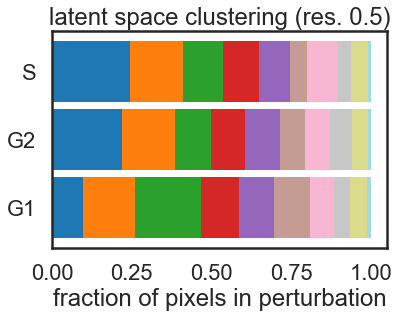

In [8]:
# calculate
adata = adatas['CondVAE']
cluster_name = 'clustering_res0.5'

cluster_size = {}
for pert, grp in adata.obs.groupby('cell_cycle'):
    cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
df = pd.concat(cluster_size, axis=1)
df = df / df.sum(axis=0)

coeff_variation['CondVAE'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

# plot
cats = adata.obs[cluster_name].cat.categories
fig, ax = plt.subplots()
bottom = np.array([0 for _ in df.columns]).astype('float')
for i in range(len(cats)):
    if i > 0:
        bottom += np.array(df.loc[cats[i-1]])
    ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
        color=adata.uns[cluster_name+'_colors'][i])
ax.set_xlabel('fraction of pixels in perturbation')
ax.set_title(f'latent space clustering (res. 0.5)')
plt.savefig(fig_dir/f'cluster_size_cc_condVAE_{cluster_name}.png', bbox_inches='tight')

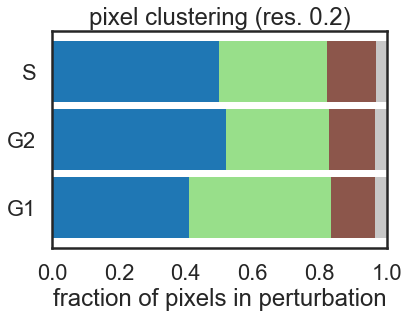

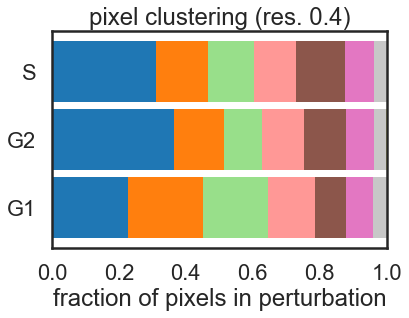

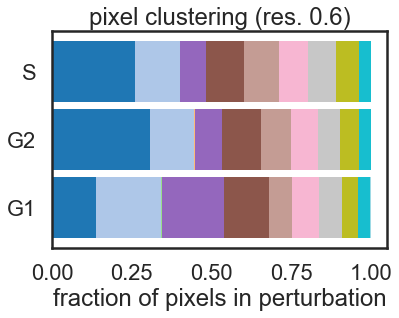

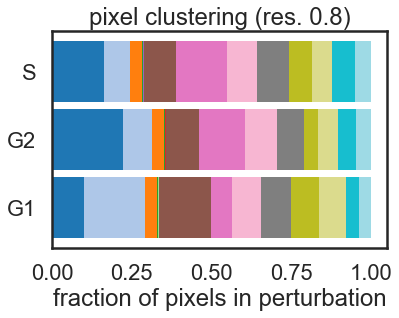

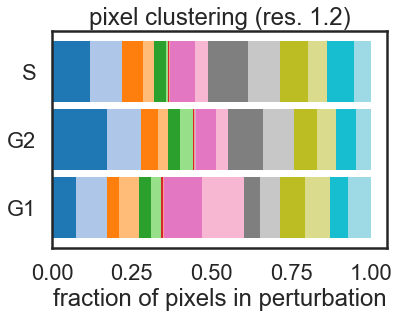

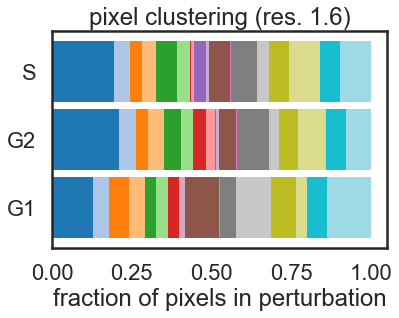

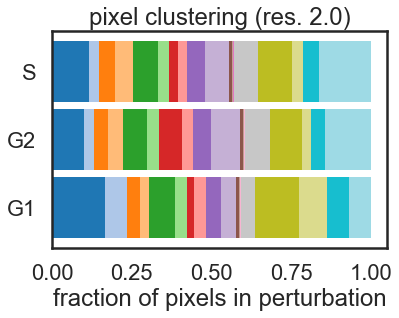

In [9]:
# calculate
adata = adatas['MPPleiden']
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    cluster_name = f'clustering_res{res:.1f}'

    cluster_size = {}
    for pert, grp in adata.obs.groupby('cell_cycle'):
        cluster_size[pert] = grp.groupby(cluster_name)['mapobject_id'].count()
    df = pd.concat(cluster_size, axis=1)
    df = df / df.sum(axis=0)

    coeff_variation['MPPleiden'][cluster_name] = df.std(axis=1) / df.mean(axis=1)

    # plot
    cats = adata.obs[cluster_name].cat.categories
    fig, ax = plt.subplots()
    bottom = np.array([0 for _ in df.columns]).astype('float')
    for i in range(len(cats)):
        if i > 0:
            bottom += np.array(df.loc[cats[i-1]])
        ax.barh(list(df.columns), list(df.loc[cats[i]]), 0.9, label=cats[i], left=bottom, 
            color=adata.uns[cluster_name+'_colors'][i])
    ax.set_xlabel('fraction of pixels in perturbation')
    ax.set_title(f'pixel clustering (res. {res:.1f})')
    plt.savefig(fig_dir/f'cluster_size_cc_MPPleiden_{cluster_name}.png', bbox_inches='tight')

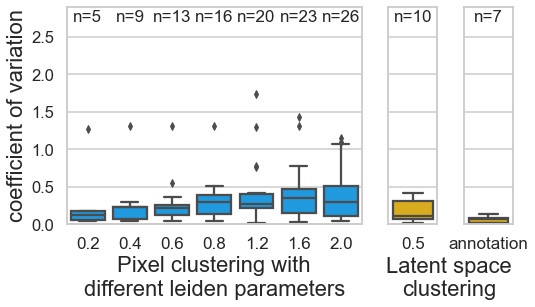

In [18]:
sns.set_style('whitegrid')
sns.set_context('talk', rc = {'font.family': 'Arial'})
fs_labels = 22
fs_n = 17
fs_ax = 17

df = pd.concat(coeff_variation['MPPleiden']).reset_index()
fig, axes = plt.subplots(1,3, figsize=(8,4), sharey=True, gridspec_kw={'width_ratios': [6, 1, 1]})
p = sns.boxplot(data=df, x='level_0', y=0, color=blue, ax=axes[0])
p.set_xlabel('Pixel clustering with\ndifferent leiden parameters',  fontsize=fs_labels)
p.set_ylabel('coefficient of variation', fontsize=fs_labels)
axes[0].set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0], fontdict={'fontsize': fs_ax})
# add cluster number
num_clusters = [len(adatas['MPPleiden'].obs[f'clustering_res{res:.1f}'].cat.categories) for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]]
for i,n in enumerate(num_clusters):
    axes[0].annotate(f'n={n}', (i,2.7), ha='center', fontsize=fs_n)

df = coeff_variation['CondVAE']['clustering_res0.5'].reset_index()
df['level_0'] = 1
p = sns.boxplot(data=df, x='level_0', y=0, color=yellow, ax=axes[1])
axes[1].set_xticklabels([0.5], fontdict={'fontsize': fs_ax})
p.set(xlabel='', ylabel='')
# add cluster number
num_clusters = len(adatas['CondVAE'].obs[f'clustering_res0.5'].cat.categories)
axes[1].annotate(f'n={num_clusters}', (0,2.7), ha='center', fontsize=fs_n)

df = coeff_variation['CondVAE']['annotation'].reset_index()
df['level_0'] = 1
p = sns.boxplot(data=df, x='level_0', y=0, color=yellow, ax=axes[2])
axes[2].set_xticklabels(['annotation'], fontdict={'fontsize': fs_ax})
p.set(xlabel='', ylabel='')
# add cluster number
num_clusters = len(adatas['CondVAE'].obs[f'annotation'].cat.categories)
axes[2].annotate(f'n={num_clusters}', (0,2.7), ha='center', fontsize=fs_n)
axes[2].annotate(f'Latent space\nclustering', (-0.3,-0.33), ha='center', fontsize=fs_labels, xycoords='axes fraction')

plt.ylim(0,2.9)
plt.savefig(fig_dir/'coeff_variation_cc_clustering.png', bbox_inches='tight', dpi=300)


In [11]:
# print mean coefficient of variation
print('MPPleiden clustering')
for res in [0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2.0]:
    print('\tresolution {}: {:.2f}, min {:.2f}, max {:.2f}'.format( res,
        np.median(coeff_variation['MPPleiden'][f'clustering_res{res:.1f}']),
        np.min(coeff_variation['MPPleiden'][f'clustering_res{res:.1f}']),
        np.max(coeff_variation['MPPleiden'][f'clustering_res{res:.1f}'])))
print('CondVAE clustering: {:.2f}, min {:.2f}, max {:.2f}'.format(np.median(coeff_variation['CondVAE']['clustering_res0.5']),
                                                                 np.min(coeff_variation['CondVAE']['clustering_res0.5']),
                                                                 np.max(coeff_variation['CondVAE']['clustering_res0.5'])))
print('CondVAE annotation: {:.2f}, min {:.2f}, max {:.2f}'.format(np.median(coeff_variation['CondVAE']['annotation']),
                                                                 np.min(coeff_variation['CondVAE']['annotation']),
                                                                 np.max(coeff_variation['CondVAE']['annotation'])))

MPPleiden clustering
	resolution 0.2: 0.12, min 0.04, max 1.27
	resolution 0.4: 0.22, min 0.04, max 1.31
	resolution 0.6: 0.21, min 0.04, max 1.31
	resolution 0.8: 0.30, min 0.04, max 1.31
	resolution 1.2: 0.27, min 0.02, max 1.73
	resolution 1.6: 0.35, min 0.02, max 1.43
	resolution 2.0: 0.29, min 0.04, max 1.15
CondVAE clustering: 0.11, min 0.01, max 0.42
CondVAE annotation: 0.06, min 0.01, max 0.13


## Linear classifier for predicting perturbation from latent space (on val data)

### calculate scores

In [4]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score

def get_prediction_scores(X, y, measure='acc', n_val=10000, class_weights=None):
    scaled_X = preprocessing.StandardScaler().fit_transform(X)
    np.random.seed(0)
    scores = []
    # 10 times with different score
    for i in range(10):
        mask = np.full(len(y), False)
        mask[:n_val] = True
        np.random.shuffle(mask)
        clf = LogisticRegression().fit(scaled_X[~mask] , y[~mask])
        #print(len(scaled_X[mask]))
        ypred = clf.predict(scaled_X[mask])
        if measure == 'acc':
            weights = None
            if class_weights is not None:
                weights = class_weights[y[mask].astype(int)]
            score = accuracy_score(y[mask], ypred, sample_weight=weights)
        elif measure == 'balanced_acc':
            score = balanced_accuracy_score(y[mask], ypred)
        scores.append(score)
    return scores

In [5]:
exp_name = 'VAE_all/CondVAE_pert-CC'
val_data = MPPData.from_data_dir(data_dir=exp_name+'/results_epoch025/val', base_dir=campa_config.EXPERIMENT_DIR, keys=['x','y','obj_ids','latent'], data_config='NascentRNA')
adata_val = val_data.get_adata(obsm={'X_latent':'latent'})

INFO:MPPData:Created new: MPPData for NascentRNA (76432 mpps with shape (3, 3, 34) from 1181 objects). Data keys: ['y', 'obj_ids', 'x', 'conditions', 'mpp', 'labels'].
INFO:MPPData:Loaded data from datasets/184A1_all_frac0005_neigh3_cond_pert-CC/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (76432 mpps with shape (1, 1, 34) from 1181 objects). Data keys: ['y', 'latent', 'obj_ids', 'x', 'mpp'].
INFO:MPPData:Before subsetting: 1181 objects
INFO:MPPData:Subsetting to 1181 objects
INFO:MPPData:Updated data to keys ['y', 'obj_ids', 'x', 'conditions', 'mpp', 'labels', 'latent']
INFO:MPPData:Loaded data from VAE_all/CondVAE_pert-CC/results_epoch025/val, with base data from datasets/184A1_all_frac0005_neigh3_cond_pert-CC/val


In [11]:
scores = {}
# classification from latent
scores_latent = {}
for cc1, cc2 in [('G1','G2'), ('G1','S'), ('G2', 'S')]:
    # prediction scores for distinguishing perturbations
    mask = np.in1d(adata_val.obs['cell_cycle'], [cc1, cc2])
    y = adata_val[mask].obs['cell_cycle'] == cc1
    X = adata_val[mask].obsm['X_latent']
    X_pca = PCA(n_components=10).fit_transform(X)
    scores_latent[f"{cc1} vs {cc2}"] = get_prediction_scores(X_pca, y, n_val=int(len(y)*0.1), measure='balanced_acc')
scores['latent space'] = scores_latent

# classification from MPP
scores_mpp = {}
for cc1, cc2 in [('G1','G2'), ('G1','S'), ('G2', 'S')]:
    # prediction scores for distinguishing perturbations
    mask = np.in1d(adata_val.obs['cell_cycle'], [cc1, cc2])
    y = adata_val[mask].obs['cell_cycle'] == cc1
    X = adata_val[mask].X
    X_pca = PCA(n_components=10).fit_transform(X)
    scores_mpp[f"{cc1} vs {cc2}"] = get_prediction_scores(X_pca, y, n_val=int(len(y)*0.1), measure='balanced_acc')
scores['pixel profile'] = scores_mpp

# save scores
json.dump(scores, open(fig_dir/'acc_linear_classifier_cc.json', 'w'), indent=4)

### plot scores

In [12]:
scores = json.load(open(fig_dir/'acc_linear_classifier_cc.json', 'r'))

In [13]:
df = pd.concat({key: pd.DataFrame(scores[key]).mean(axis=0) for key in scores.keys()}, axis=0)
df.index.set_names(['data type', 'cell cycle'], inplace=True)
df = df.reset_index().rename(columns={0:'balanced accuracy'})

In [9]:
df

,data type,cell cycle,balanced accuracy
0,latent space,G1 G2,0.578877
1,latent space,G1 S,0.632680
2,latent space,G2 S,0.579213
3,pixel profile,G1 G2,0.669760
4,pixel profile,G1 S,0.667586
5,pixel profile,G2 S,0.620939


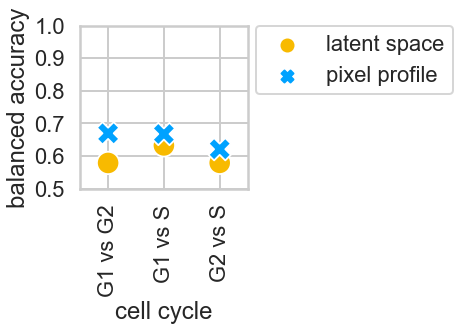

In [15]:
# alternative plot
sns.set_style('whitegrid')
sns.set_context('poster')
fig, ax = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=df, x='cell cycle', y='balanced accuracy', ax=ax, hue='data type', style='data type', palette=[yellow, blue], s=500)
plt.xticks(rotation=90)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlim(-0.5, 2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(fig_dir/'acc_linear_classifier_cc.png', bbox_inches='tight')

In [16]:
# print mean acc for each classifier
df.groupby('data type').median()

,balanced accuracy
data type,
latent space,0.579213
pixel profile,0.667586
